In [4]:
import numpy as np
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import io, color, transform

import cv2
import numpy as np
import os
import pandas as pd
import re

from PIL import Image
from sklearn.preprocessing import MinMaxScaler

READ DATA

In [5]:
#data_train = pd.read_csv("/Users/lethanhtien/Desktop/run/data/train.csv")
data = pd.read_csv("/Users/lethanhtien/Desktop/UIT/MACHINE LEARNING/CS114.O11-FinalProject/data.csv")


CHECK CLASS IMBALANCE

In [6]:
class_counts = data['label'].value_counts()
print(class_counts)

label
1    1000
0    1000
3    1000
4    1000
2    1000
Name: count, dtype: int64


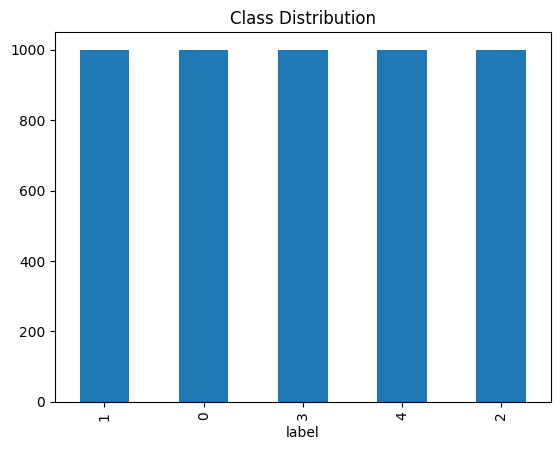

In [7]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cân bằng lớp
class_counts.plot(kind='bar', title='Class Distribution')
plt.show()


In [8]:
total_samples = len(data)
class_ratios = class_counts / total_samples
print(class_ratios)


label
1    0.2
0    0.2
3    0.2
4    0.2
2    0.2
Name: count, dtype: float64


SPLIT DATA

In [9]:
# x_train = data_train.drop("label", axis=1)
# y_train = data_train['label']

# x_test = data_test.drop("label", axis=1)
# y_test = data_test['label']

x = data.drop("label", axis=1)
y = data['label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

In [11]:
X_train[0]

array([253, 250, 255, ..., 153, 154, 160])

SCALE DATA

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
# Khởi tạo mô hình MinMaxScaler và fit trên tập huấn luyện
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Sử dụng mô hình đã fit để chuẩn hóa tập kiểm tra
X_test_scaled = scaler.transform(X_test)

TRAINING

In [15]:
from sklearn.svm import SVC
# Huấn luyện mô hình SVM với các tham số cụ thể
svm_model = SVC(C=0.1, gamma=0.1, kernel='linear', probability=True)
svm_model.fit(X_train_scaled, y_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred = svm_model.predict(X_test_scaled)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.609


EVALUATE

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Tính precision, recall, và f1-score cho từng lớp
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

class_names = [0,1,2,3,4]

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')

for i in range(len(class_names)):
    print(f"Class {class_names[i]}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall: {recall[i]:.4f}")
    print(f"  F1-Score: {f1[i]:.4f}")
    print()


Accuracy: 0.609

Class 0:
  Precision: 0.4793
  Recall: 0.5474
  F1-Score: 0.5111

Class 1:
  Precision: 0.4783
  Recall: 0.4074
  F1-Score: 0.4400

Class 2:
  Precision: 0.4320
  Recall: 0.4635
  F1-Score: 0.4472

Class 3:
  Precision: 0.8090
  Recall: 0.8385
  F1-Score: 0.8235

Class 4:
  Precision: 0.8608
  Recall: 0.7952
  F1-Score: 0.8267



TEST

In [18]:
def test(path):
    # Đường dẫn của tấm ảnh
    image_path = path

    # Mở ảnh bằng Pillow
    img = Image.open(image_path)

    # Chuyển ảnh về ảnh trắng đen
    img = img.convert("L")

    # Chuyển ảnh thành mảng NumPy
    img_array = np.array(img)

    # Resize ảnh về kích thước mong muốn
    resized_img = cv2.resize(img_array, (48, 48))

    flattened_img = resized_img.flatten().reshape(-1, 1)
    # Use MinMaxScaler
    scaler = MinMaxScaler()
    img1 = scaler.fit_transform(flattened_img).T

    y_pred = svm_model.predict(img1)

    return y_pred

In [25]:
test("/Users/lethanhtien/Desktop/UIT/MACHINE LEARNING/CS114.O11-FinalProject/data_img/fear/(fear) 298.jpg")

array([1])

SAVE MODEL

In [46]:
from joblib import dump
dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']

SHAP

TRAINING

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Thiết lập các giá trị thử nghiệm cho C, kernel và gamma
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': [0.1, 1, 10]}

# Tạo mô hình SVM
svm_model = SVC()

# Sử dụng GridSearchCV để tìm kiếm qua lưới tham số
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# Đánh giá mô hình trên tập kiểm tra
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy: 0.579
